# Required Libraries

In [1]:
# Directory
import os, zipfile, shutil

# Preprocessing and Layer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout, Conv2D

# Plotting
import matplotlib.pyplot as plt

# Dataset Preparation

**Dataset Source**  
https://www.kaggle.com/datasets/alessiocorrado99/animals10

Install kaggle package.

In [2]:
!pip install -q kaggle

Upload kaggle.json

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochammadadhibuchori","key":"e42b6a2ae1ee80ded598c06f563111ef"}'}

Preparing the directory.

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

Download dataset.

In [5]:
!kaggle datasets download -d viratkothari/animal10

 97% 569M/585M [00:04<00:00, 127MB/s] 
100% 585M/585M [00:04<00:00, 127MB/s]


Extract the zip file.

In [6]:
local_zip = '/content/animal10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Defines the directory name for the train data and validation data.

In [7]:
main_dir = os.path.join('/content/Animals-10')
print(os.listdir(main_dir))

['elephant', 'dog', 'cat', 'sheep', 'chicken', 'cow', 'squirrel', 'spider', 'butterfly', 'horse']


Delete unneeded folders.

In [8]:
ignore_dir = ['elephant', 'cat', 'sheep', 'cow', 'squirrel', 'butterfly', 'horse']

for dir in ignore_dir:
  path = os.path.join(main_dir, dir)
  shutil.rmtree(path)

print(os.listdir(main_dir))

['dog', 'chicken', 'spider']


In [9]:
from PIL import Image
samples = 0

for x in os.listdir(main_dir):
  dir = os.path.join('/content/Animals-10', x)
  y = len(os.listdir(dir))
  print(x+' :', y)
  samples = samples + y
  
  image_name = os.listdir(dir)
  for z in range(3):
    image_path = os.path.join(dir, image_name[z])
    image = Image.open(image_path)
    print(image.size)
  print()


print('Total Sample : ', samples)

dog : 4863
(225, 300)
(300, 188)
(278, 300)

chicken : 3098
(300, 225)
(300, 178)
(300, 225)

spider : 4821
(245, 245)
(300, 221)
(300, 199)

Total Sample :  12782


# Split Dataset

Splitting the dataset into train sets and validation sets with sizes of 80% and 20%, respectively.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2)

In [11]:
train_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    main_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='validation')

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.


# Callback

In [12]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') and logs.get('val_accuracy') > 0.92):
      print("\n Sorry, data training was stopped because the accuracy rate was above 92%!")
      self.model.stop_training = True

callbacks = Callback()

# Prepare CNN Model Architecture


In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))),
model.add(MaxPooling2D(2, 2)),

model.add(Conv2D(64, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(128, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(128, (3,3), activation='relu')),
model.add(MaxPooling2D(2,2)),

model.add(Flatten()),

model.add(Dense(512, activation='relu')),
model.add(Dense(3, activation='softmax')),

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    verbose=2,
    callbacks=[callbacks])

Epoch 1/50
80/80 - 91s - loss: 1.0436 - accuracy: 0.4644 - val_loss: 0.9328 - val_accuracy: 0.6121 - 91s/epoch - 1s/step
Epoch 2/50
80/80 - 74s - loss: 0.7420 - accuracy: 0.6780 - val_loss: 0.6255 - val_accuracy: 0.7425 - 74s/epoch - 931ms/step
Epoch 3/50
80/80 - 74s - loss: 0.5853 - accuracy: 0.7580 - val_loss: 0.5678 - val_accuracy: 0.7652 - 74s/epoch - 930ms/step
Epoch 4/50
80/80 - 77s - loss: 0.4976 - accuracy: 0.8069 - val_loss: 0.4651 - val_accuracy: 0.8223 - 77s/epoch - 961ms/step
Epoch 5/50
80/80 - 75s - loss: 0.4351 - accuracy: 0.8309 - val_loss: 0.4944 - val_accuracy: 0.8102 - 75s/epoch - 939ms/step
Epoch 6/50
80/80 - 75s - loss: 0.3903 - accuracy: 0.8548 - val_loss: 0.4599 - val_accuracy: 0.8184 - 75s/epoch - 936ms/step
Epoch 7/50
80/80 - 75s - loss: 0.3551 - accuracy: 0.8655 - val_loss: 0.4095 - val_accuracy: 0.8517 - 75s/epoch - 943ms/step
Epoch 8/50
80/80 - 74s - loss: 0.3339 - accuracy: 0.8756 - val_loss: 0.3768 - val_accuracy: 0.8595 - 74s/epoch - 931ms/step
Epoch 9/50


# Plotting

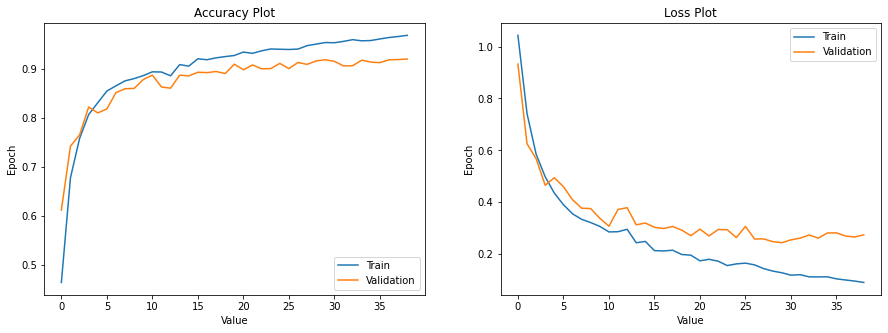

In [16]:
figure = plt.figure(figsize = (15, 5))

figure.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.xlabel('Value')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')

figure.add_subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.xlabel('Value')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')

# TF-Lite Model Preparation

Convert the Model to TF-Lite

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp_kidvm53/assets


Saving the TF-Lite Model

In [18]:
# Menyimpan TFlite Model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)